In [226]:
import numpy as np
import pandas as pd
#from fancyimpute umpy as np
import pandas as p
# import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import seaborn as sns 
import warnings 
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import make_scorer
# Filter out warnings from models
warnings.filterwarnings('ignore')

In [227]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score,GridSearchCV
import sklearn.metrics as metrics

In [228]:
scorer = make_scorer(recall_score, greater_is_better=True, average = 'macro')

In [229]:
from imblearn.over_sampling import SMOTE

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier

In [231]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
%matplotlib inline

In [233]:
df=pd.read_csv("telecom_churn_data.csv")
pd.options.display.max_columns = None

In [234]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [235]:
df.shape

(99999, 226)

In [236]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [237]:
# Finding date columns as they are not useful for our case study
date_cols =[x for x in df.columns[df.columns.str.contains('date')]]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [238]:
# Since, dates of recharge are not helpful for our case study so we would just remove it from our dataset
df.drop(date_cols, axis=1, inplace=True)

# Also dropping two more columns that are not very useful for my analysis
df.drop('mobile_number', axis=1, inplace=True)
df.drop('circle_id', axis=1, inplace=True)

In [239]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 212 columns):
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8    

In [240]:
# Let's find out how many columns do we have with recharge information
df.shape
rech_cols =[x for x in df.columns[df.columns.str.contains('rech')]]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

#### Missing Value Treatment

In [241]:
# Columns having recharge information are important for this case study, so i would impute the missing values with 0
df[rech_cols]=df[rech_cols].apply(lambda x: x.fillna(0))

In [242]:
df.shape[0]

99999

In [243]:
# Let's check for null values
100*df_clean.isnull().sum()/len(df_clean)

loc_og_t2o_mou       0.00
std_og_t2o_mou       0.00
loc_ic_t2o_mou       0.00
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_mou_7     0.00
loc_og_t2c_mou_8     0.00
                     ... 
count_rech_3g_8      0.00
av_rech_amt_data_8   0.00
vol_2g_mb_6          0.00
vol_2g_mb_7          0.00
vol_2g_mb_8          0.00
vol_3g_mb_6          0.00
vol_3g_mb_7          0.00
vol_3g_mb_8 

Missing values between 5-10% are 58 columns.  
There are 16 columns with more than 70% missing values.  
In fact these are the 16 columns with more than 10% missing values.

In [244]:
# Now let's drop columns on the basis of null values percentage, i'm dropping if null values exceed 70%
df=df.dropna(thresh=0.7*df.shape[0],axis=1)

### Feature Engineering

##### Derive New Features

Let's derive total recharge amount for 6 and 7 month (Good Phase)

In [245]:
df['total_recharge_6']=df['total_rech_amt_6']+(df['total_rech_data_6'] * df['av_rech_amt_data_6'])

In [246]:
df['total_recharge_7']=df['total_rech_amt_7']+(df['total_rech_data_7'] * df['av_rech_amt_data_7'])

Let's drop the features that were used to derive total recharge as they are of no more use

In [247]:
df.drop(['total_rech_amt_6','total_rech_data_6','total_rech_amt_7','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7'], axis=1, inplace=True)

In [248]:
df.shape

(99999, 192)

Let's derive the average total recharge for 6 and 7 month cumulative

In [249]:
# Average of 6 and 7 months total recharge amount inclusive of internet and calls
df['average_6_7'] = df[['total_recharge_6', 'total_recharge_7']].mean(axis=1)

##### High Value Customers

In [250]:
# let's check 70th pecentile of this average column
df['average_6_7'].quantile(0.70)

478.0

In [25]:
df=df.loc[df['average_6_7']>=478]

In [26]:
df.shape

(30001, 193)

Derive term of customers (in months)

In [27]:
df['aon'].nunique()

3294

In [28]:
df['aon_mon']=df['aon']/30

In [29]:
# Let's delete df['aon'] column as it's no more in use after creation of df['aon_mon']

In [30]:
df.drop(['aon'],axis=1,inplace=True)

In [31]:
df['aon_mon'].min()

6.0

In [32]:
df['aon_mon'].max()

144.03333333333333

In [33]:
# Let's check null percentage
100*df.isnull().sum()/len(df)

loc_og_t2o_mou      0.746642
std_og_t2o_mou      0.746642
loc_ic_t2o_mou      0.746642
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
arpu_9              0.000000
onnet_mou_6         1.816606
onnet_mou_7         1.789940
onnet_mou_8         3.913203
onnet_mou_9         6.336455
offnet_mou_6        1.816606
offnet_mou_7        1.789940
offnet_mou_8        3.913203
offnet_mou_9        6.336455
roam_ic_mou_6       1.816606
roam_ic_mou_7       1.789940
roam_ic_mou_8       3.913203
roam_ic_mou_9       6.336455
roam_og_mou_6       1.816606
roam_og_mou_7       1.789940
roam_og_mou_8       3.913203
roam_og_mou_9       6.336455
loc_og_t2t_mou_6    1.816606
loc_og_t2t_mou_7    1.789940
loc_og_t2t_mou_8    3.913203
loc_og_t2t_mou_9    6.336455
loc_og_t2m_mou_6    1.816606
loc_og_t2m_mou_7    1.789940
loc_og_t2m_mou_8    3.913203
                      ...   
vol_2g_mb_8         0.000000
vol_2g_mb_9         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7   

In [34]:
# Checking for any outliers in the dataset
df.describe(percentiles=[.01,.05,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_6,total_recharge_7,average_6_7,aon_mon
count,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.0,29464.0,28827.0,28100.0,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.0000

Derive Average arpu(average revenue per user) of 6 and 7 months(Good phase) 

In [35]:
df['avg_arpu_6_7'] = df[['arpu_6', 'arpu_7']].mean(axis=1)

Derive Churn Variable

In [36]:
# Considering churn phase which is 9th month
df['total_calls_data_mou_9']=df['total_og_mou_9']+df['total_ic_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [37]:
def find_churn(x):
  if x == 0:
    return 1
  else:
    return 0

In [38]:
df['churn']=np.nan
df['churn'] = df['total_calls_data_mou_9'].apply(lambda x: find_churn(x))

In [39]:
df['churn'].nunique()

2

In [40]:
df['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

### EDA

Text(0.5,1,'Customer Term in company')

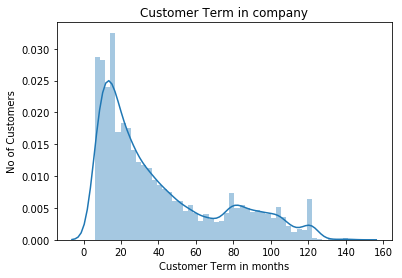

In [41]:
ax=sns.distplot(df['aon_mon'])
ax.set_ylabel('No of Customers')
ax.set_xlabel('Customer Term in months')
ax.set_title('Customer Term in company')                   

Derive term blocks for customers highlighting their duration with the company

In [42]:
# Let's make term blocks
term_range = [0, 6, 12, 24, 60, 144]
term_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['term_range'] = pd.cut(df['aon_mon'], term_range, labels=term_label)
df['term_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: term_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

Bivariate Analysis:  Churn relationship with other KPI's

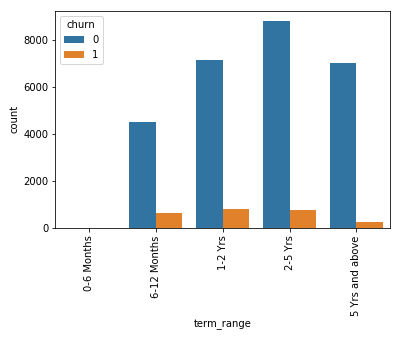

In [43]:
ax1 = sns.countplot(x="term_range", data=df, hue = "churn");
for p in ax.patches:
    ax1.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

Conclusion:  Most of the customers getting churned have less than 4 years of relationship with the company

Let's figure out how much revenue is generated against these term durations 
and whether it actually matters to retain new customers

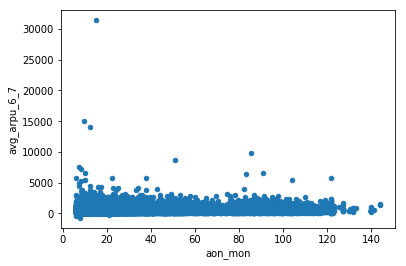

In [44]:
df[['aon_mon', 'avg_arpu_6_7']].plot.scatter(x = 'aon_mon', y='avg_arpu_6_7')

Conclusion: Yes, it matters to retain the new customers as they are generating good revenue for the company

Let's check the average revenuw generated in 8th Month against the term duration of customers

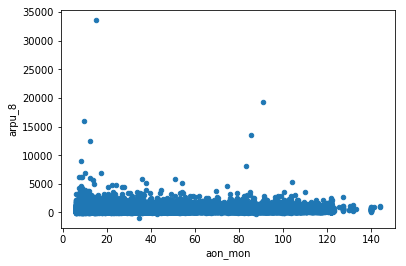

In [45]:
df[['aon_mon', 'arpu_8']].plot.scatter(x = 'aon_mon', y='arpu_8')

Conclusion: It further strenthens our conclusion above that users with less than 4 years of relationship 
    are generating good revenue for the company so they are important user base that company needs 
    to focus on retaining as their churn rate is more as compared to users that have relaionship to company more than 5 years 

Let's analyze the distribution of total recharge amount in Action phase (8 Month)

Text(0.5,1,'Customer Term in company')

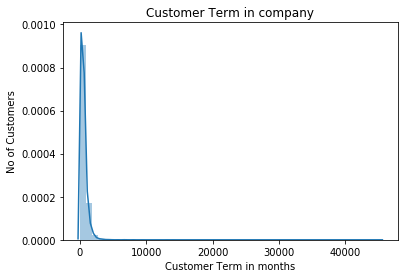

In [46]:
ax=sns.distplot(df['total_rech_amt_8'])
ax.set_ylabel('No of Customers')
ax.set_xlabel('Customer Term in months')
ax.set_title('Customer Term in company')   

In [47]:
df.drop(['term_range'], axis=1, inplace=True)

Outlier Analysis and Treatment

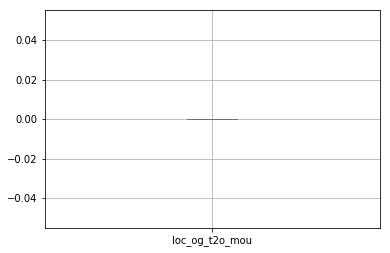

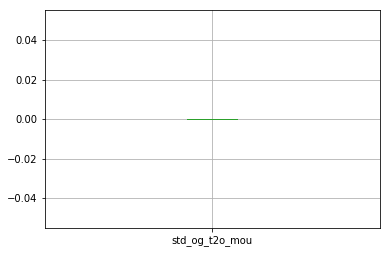

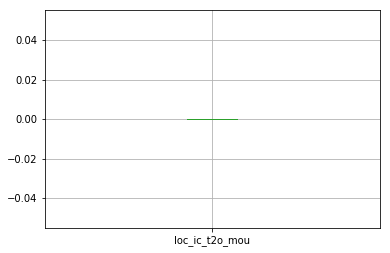

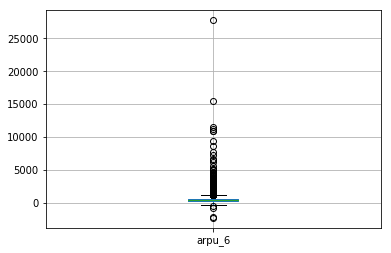

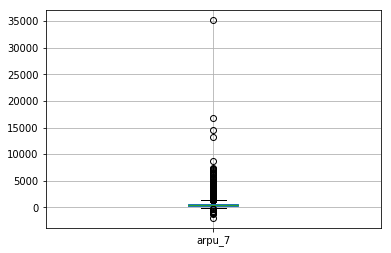

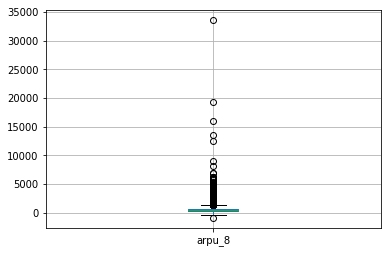

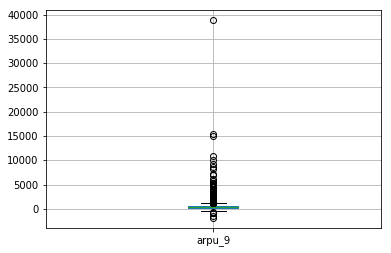

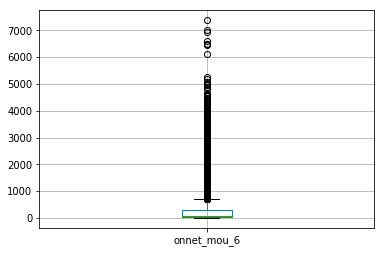

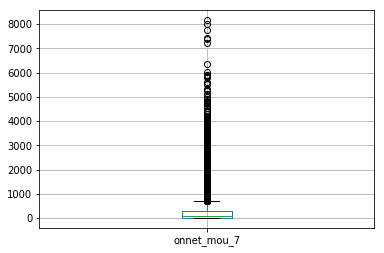

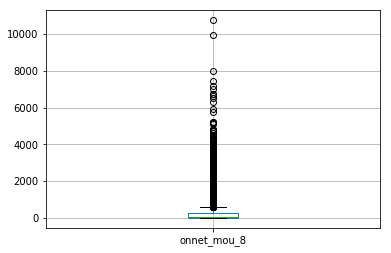

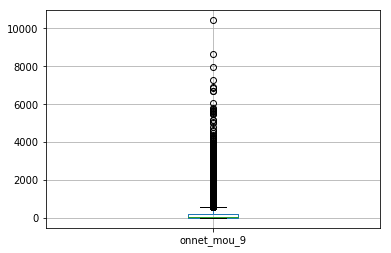

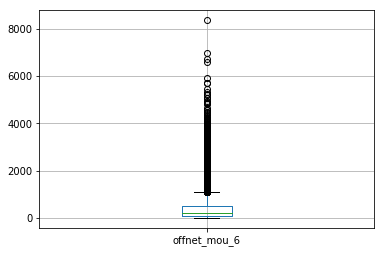

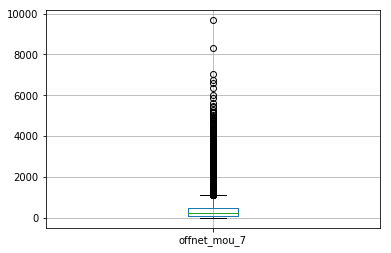

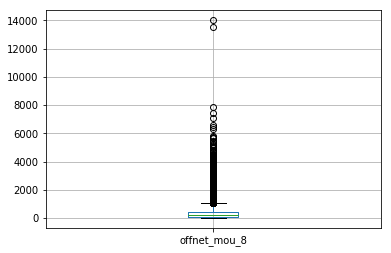

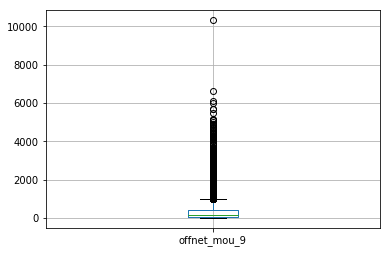

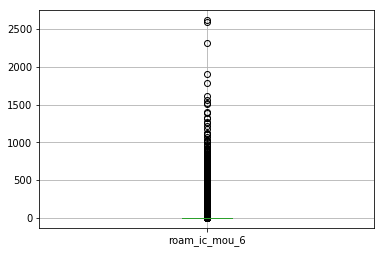

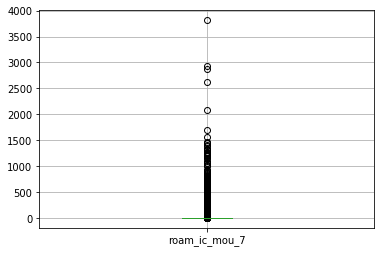

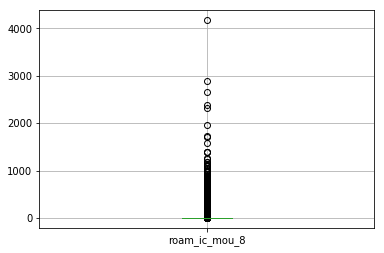

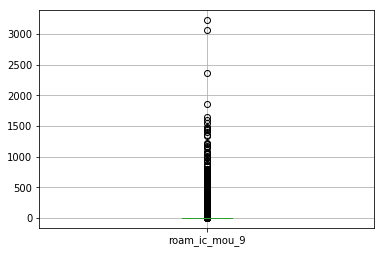

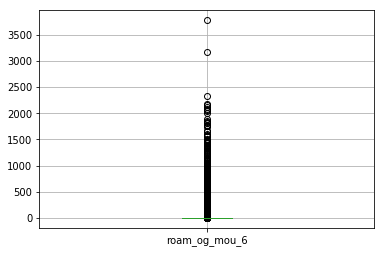

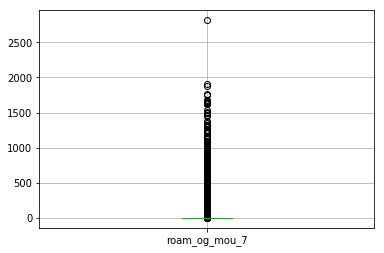

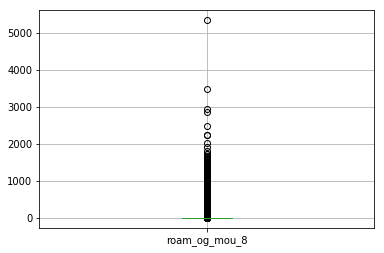

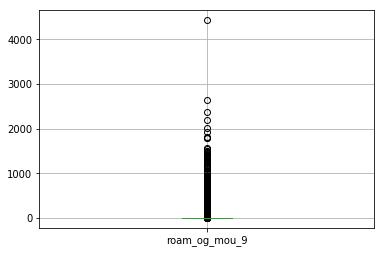

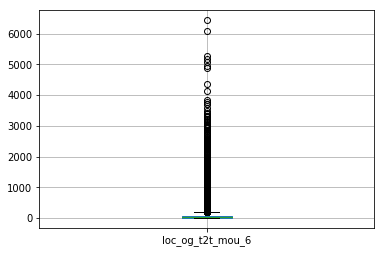

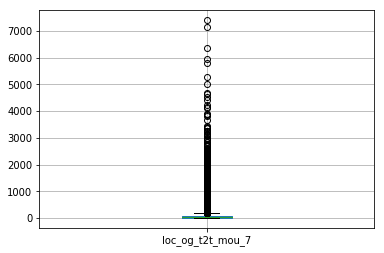

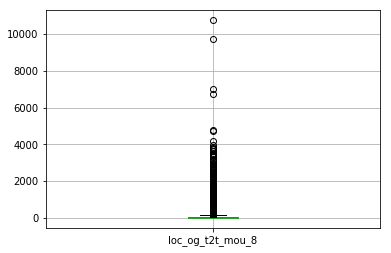

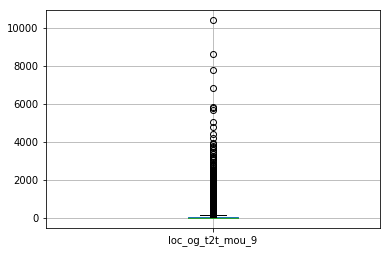

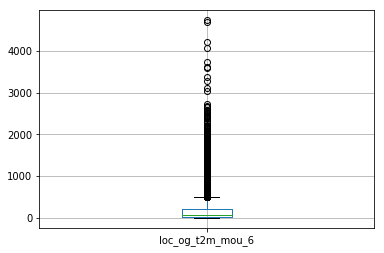

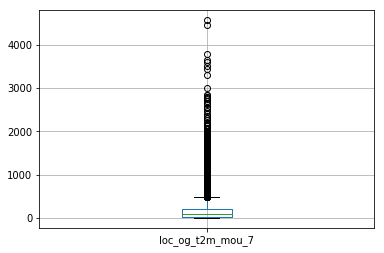

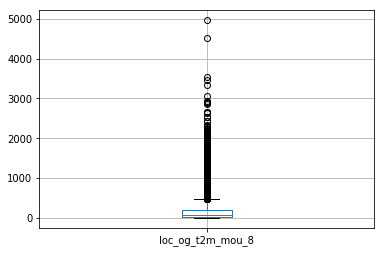

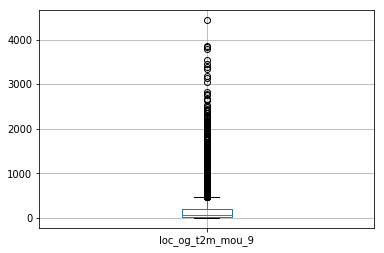

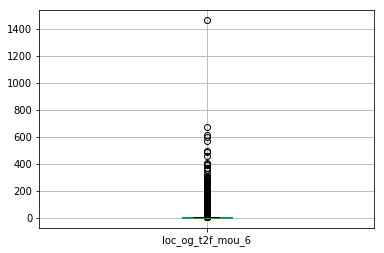

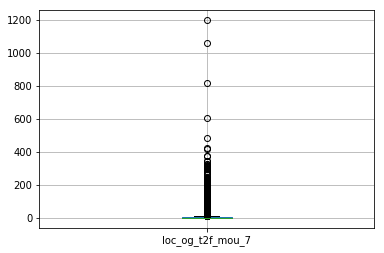

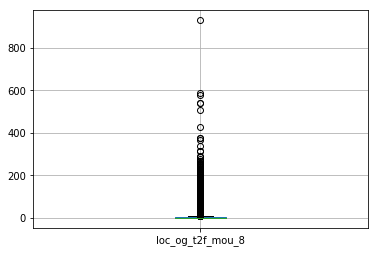

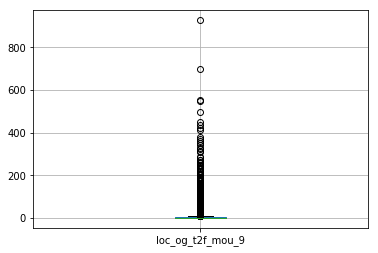

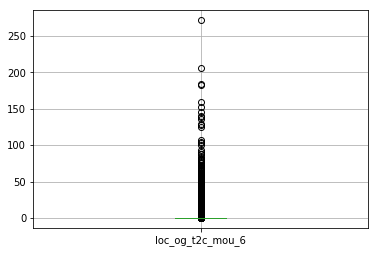

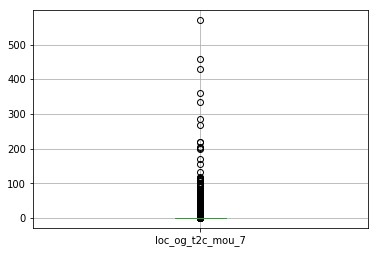

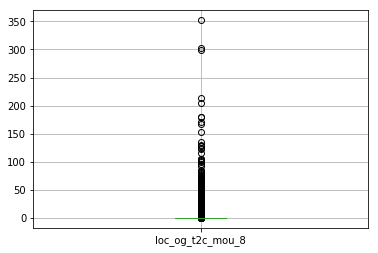

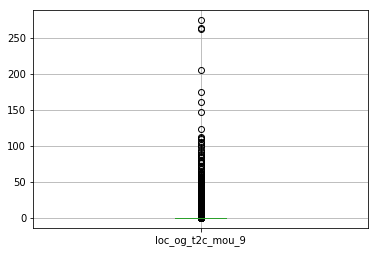

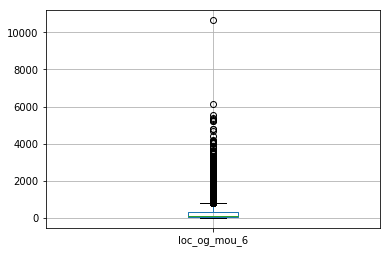

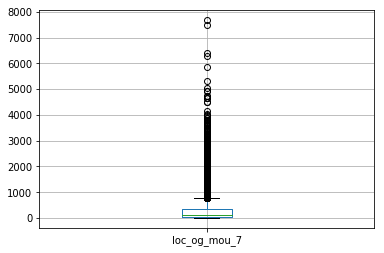

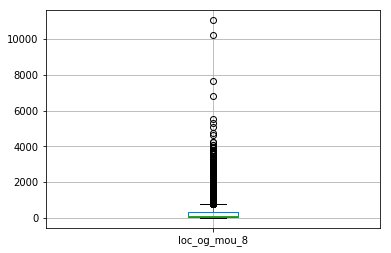

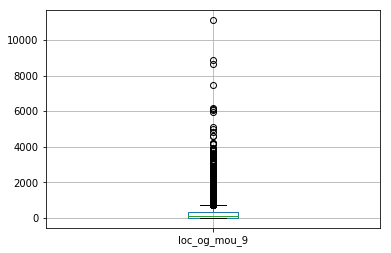

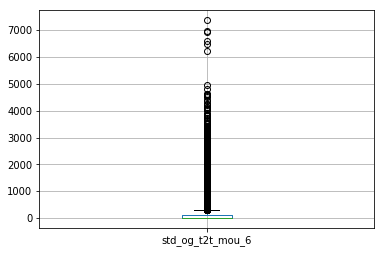

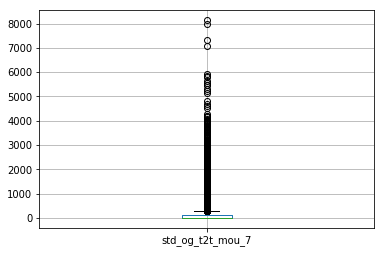

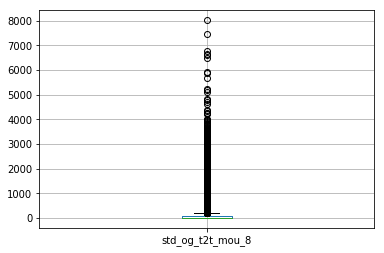

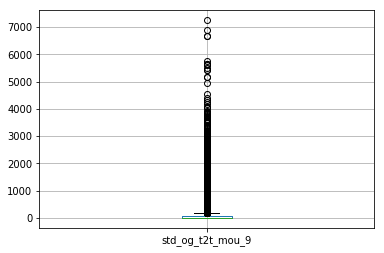

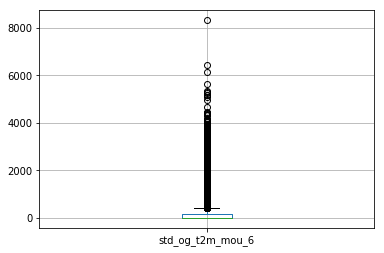

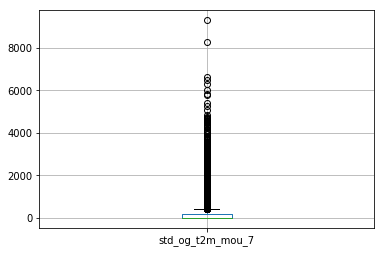

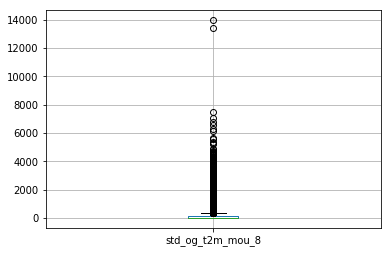

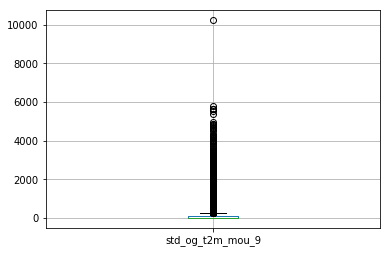

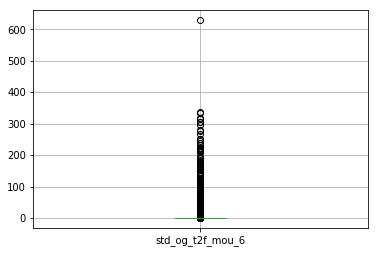

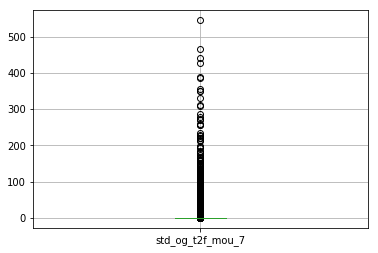

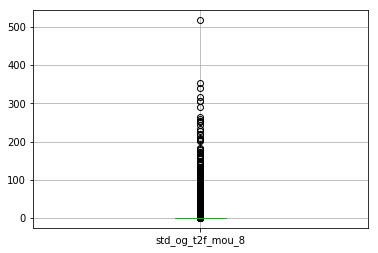

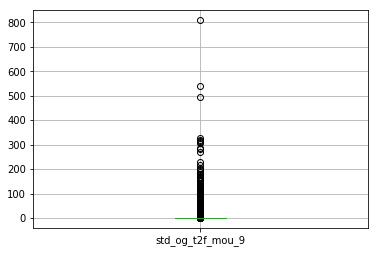

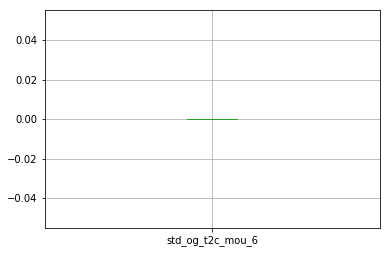

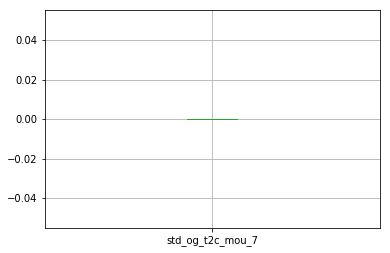

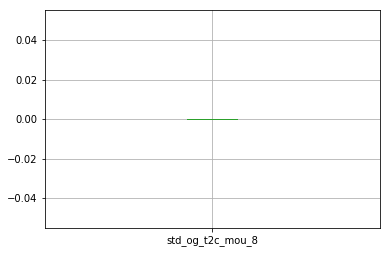

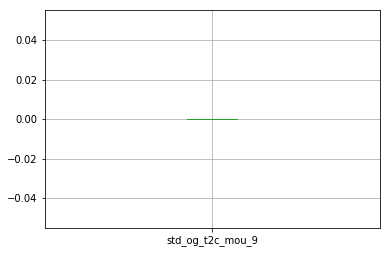

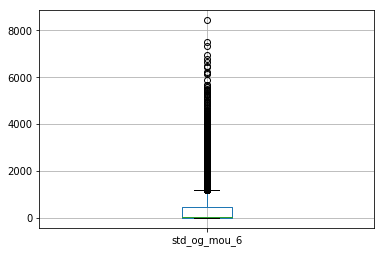

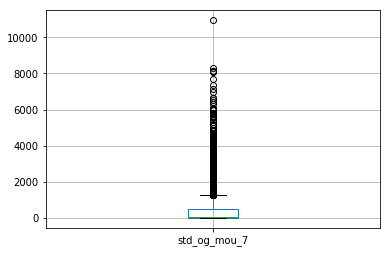

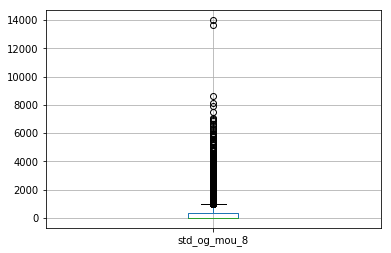

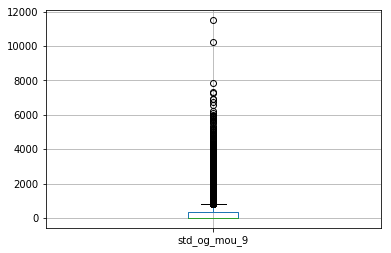

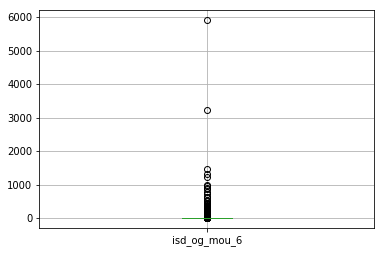

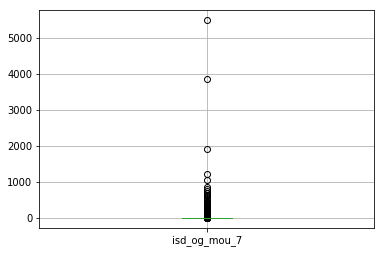

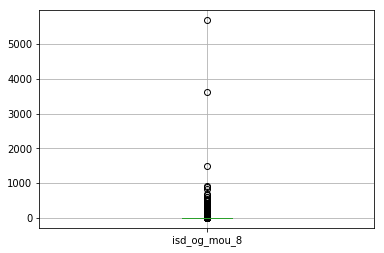

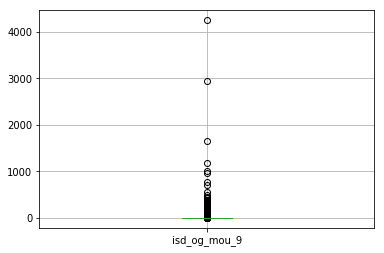

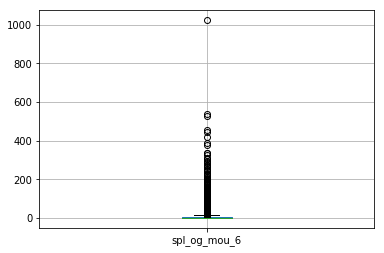

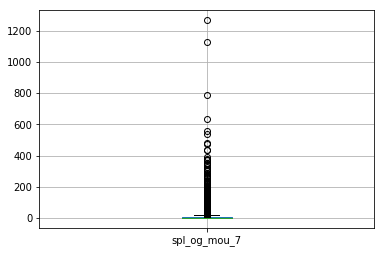

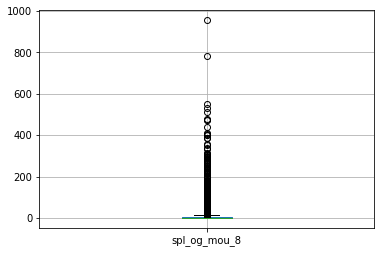

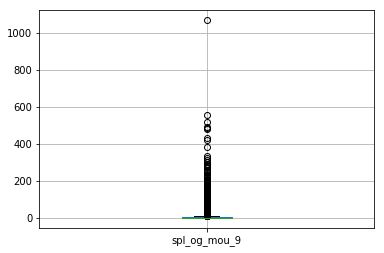

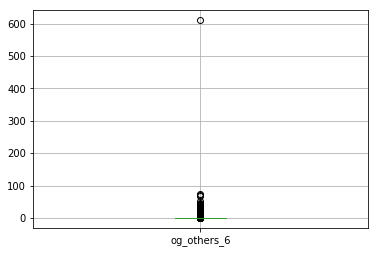

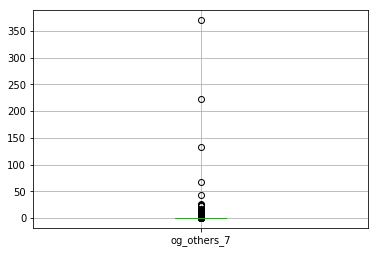

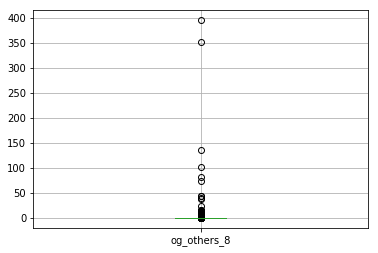

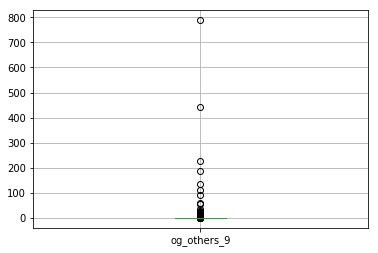

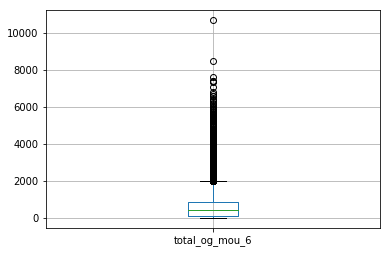

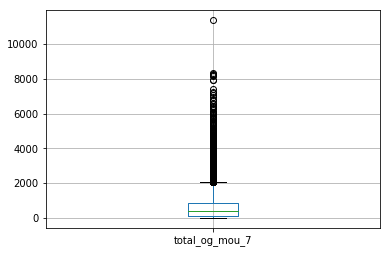

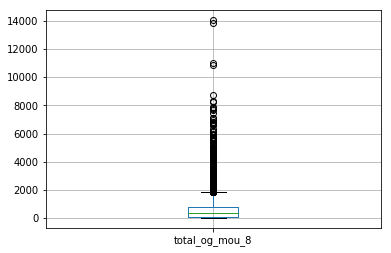

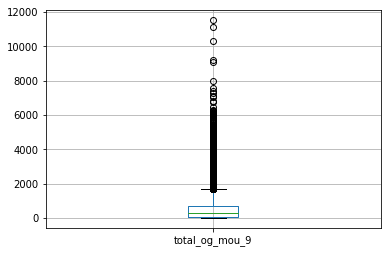

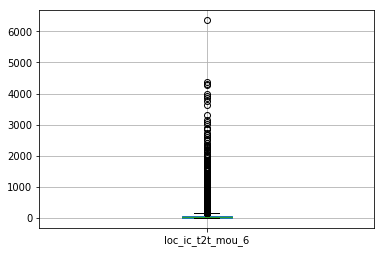

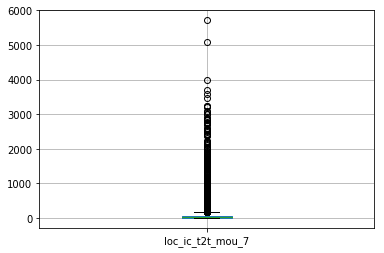

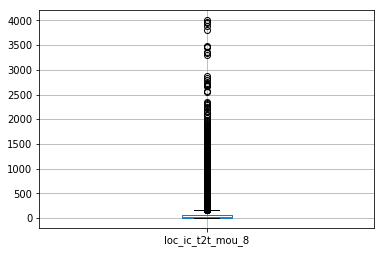

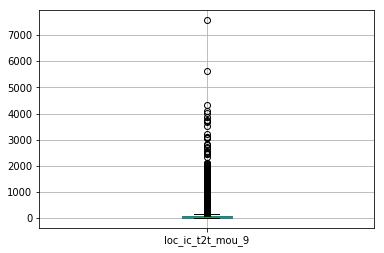

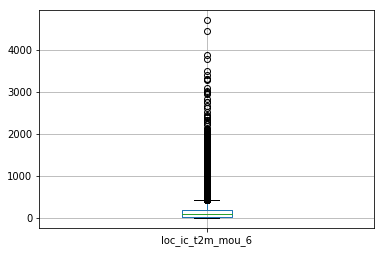

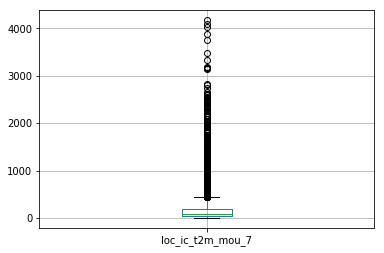

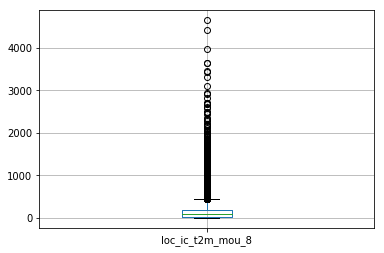

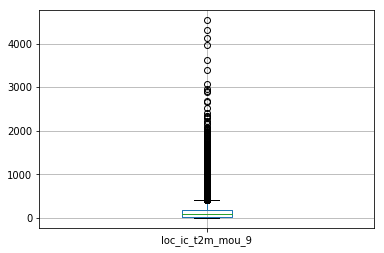

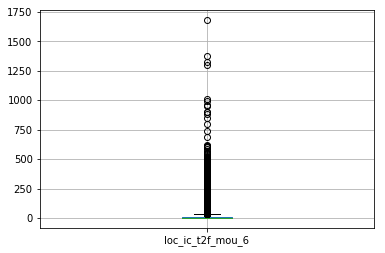

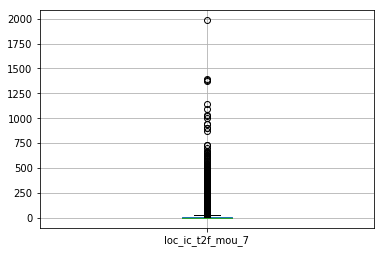

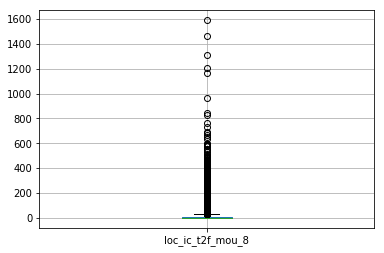

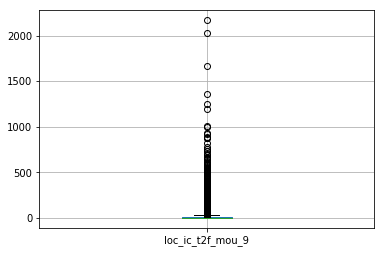

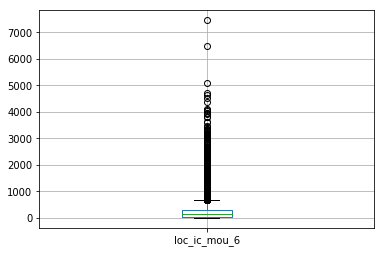

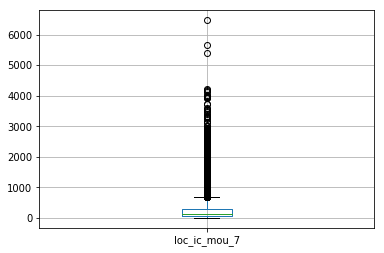

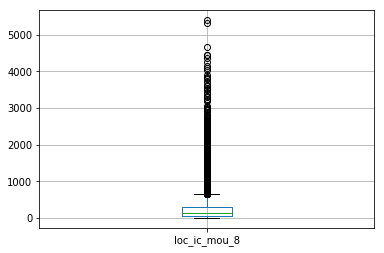

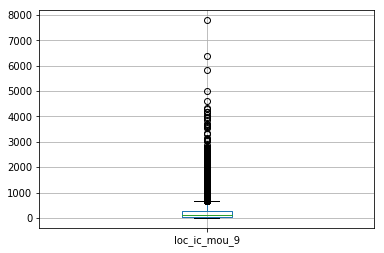

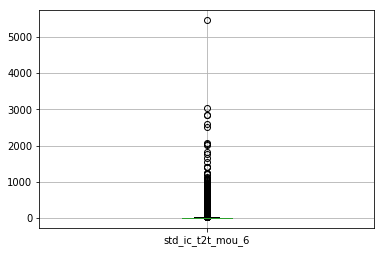

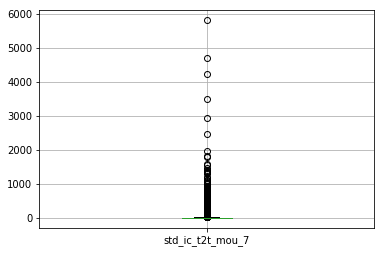

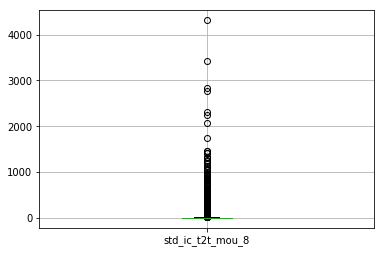

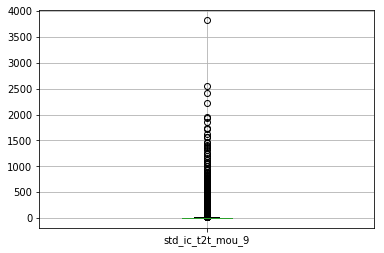

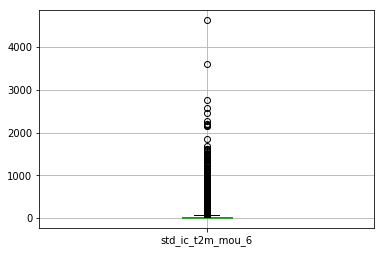

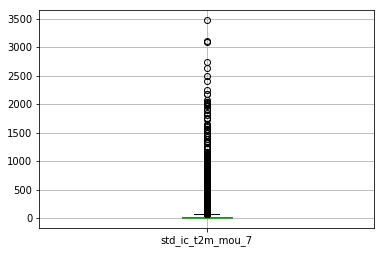

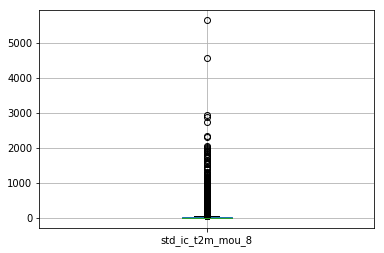

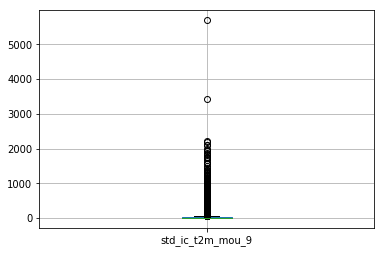

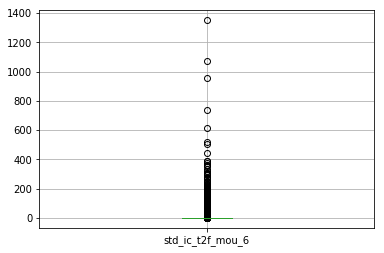

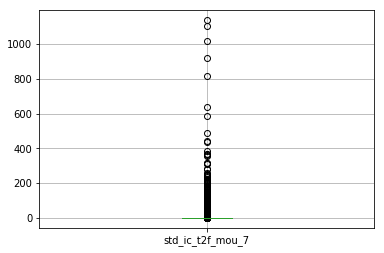

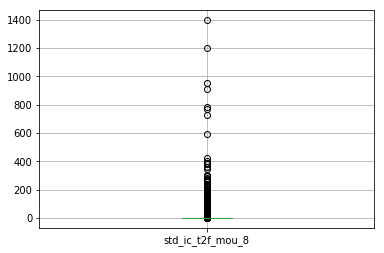

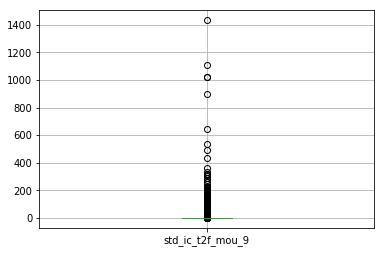

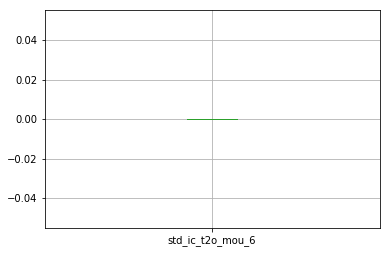

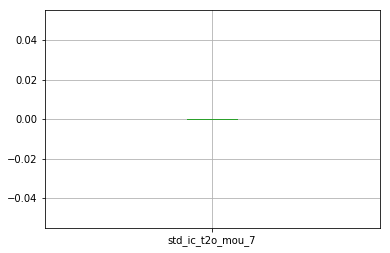

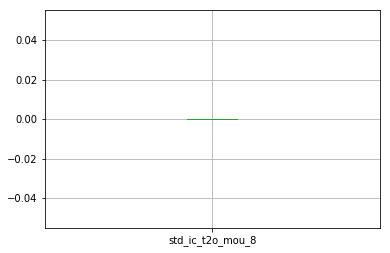

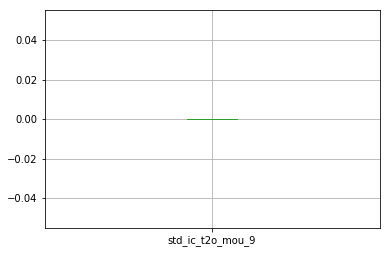

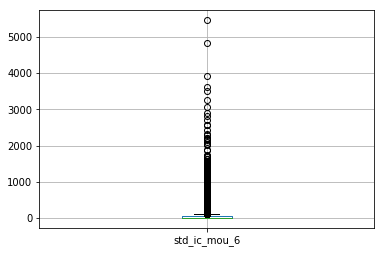

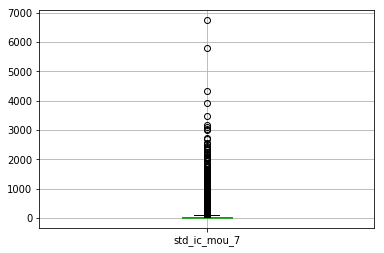

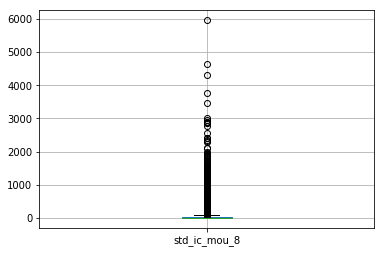

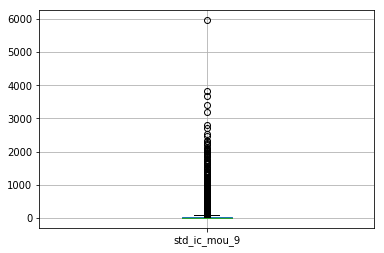

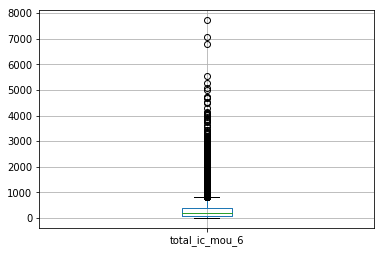

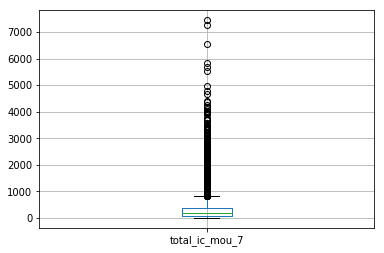

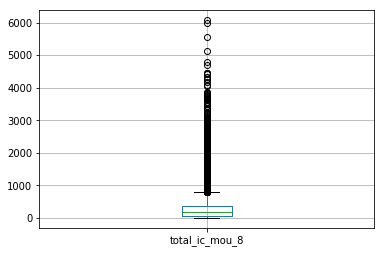

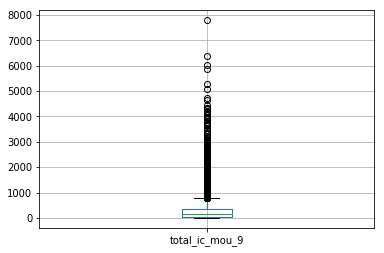

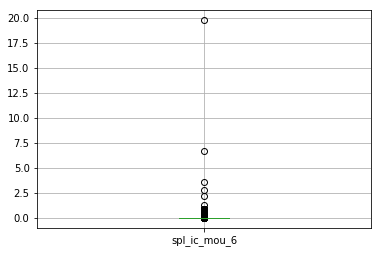

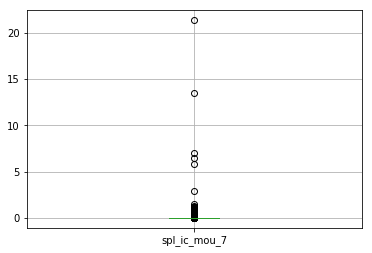

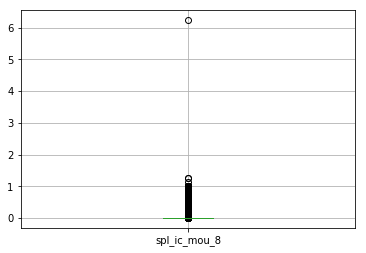

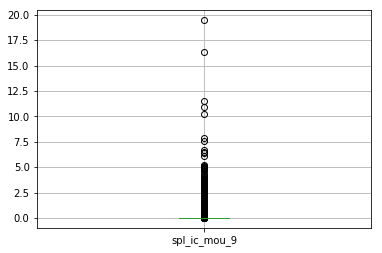

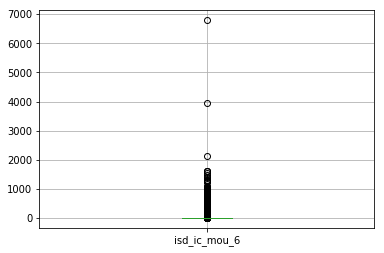

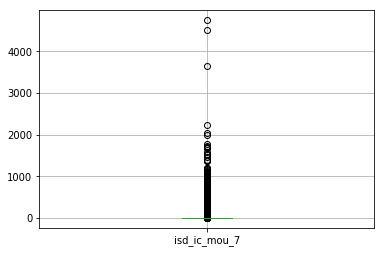

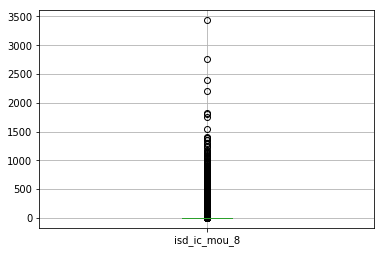

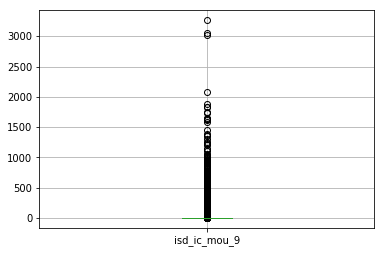

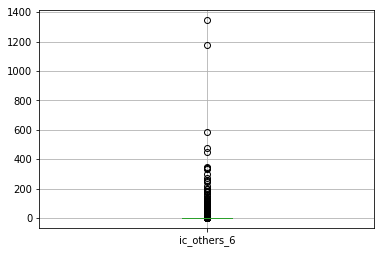

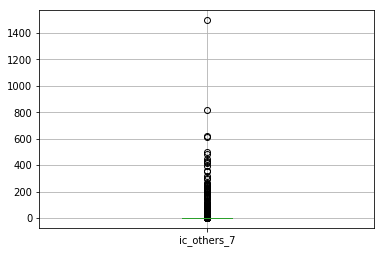

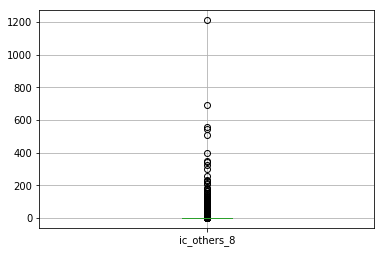

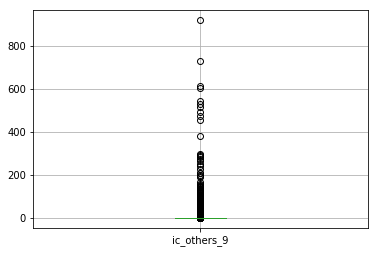

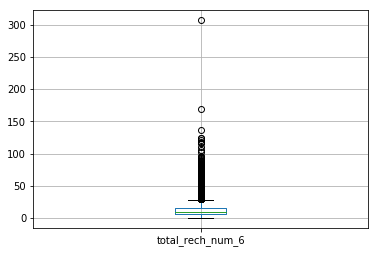

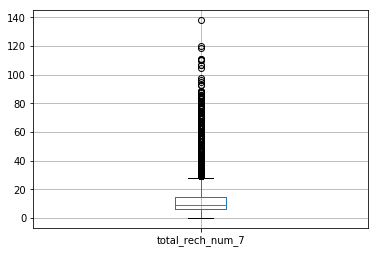

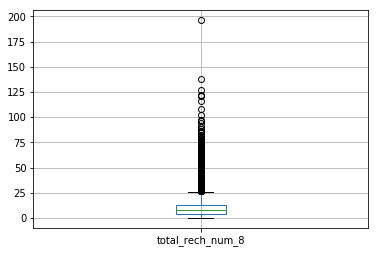

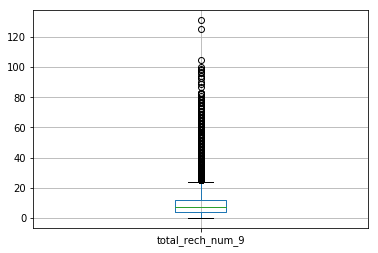

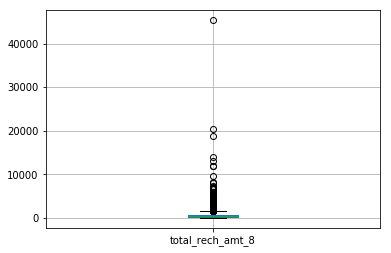

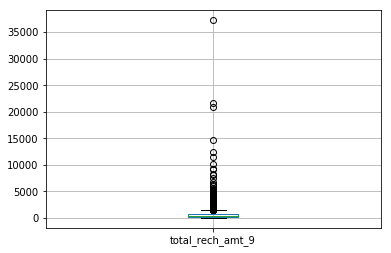

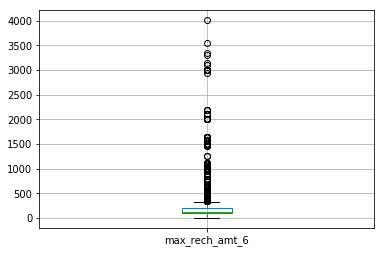

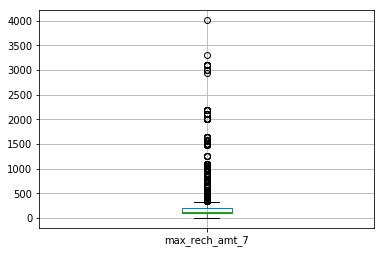

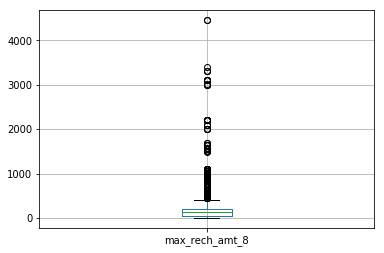

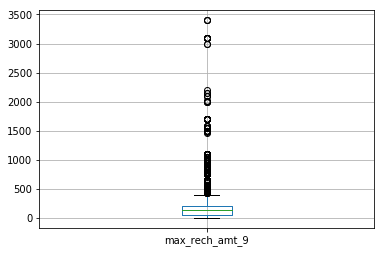

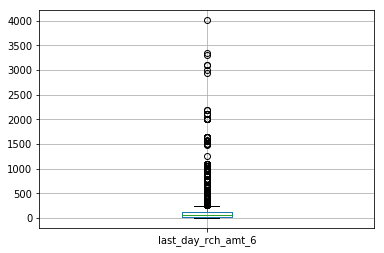

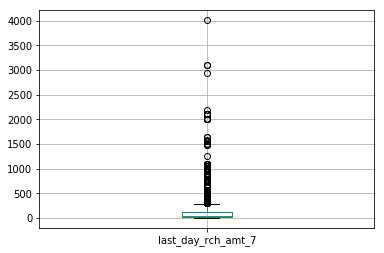

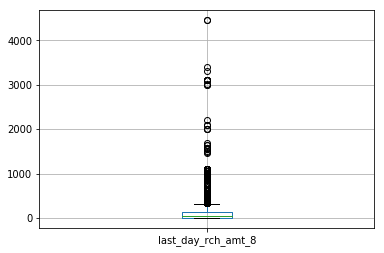

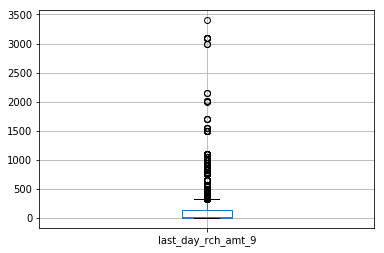

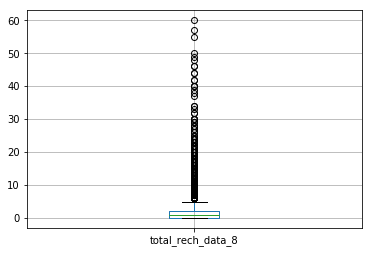

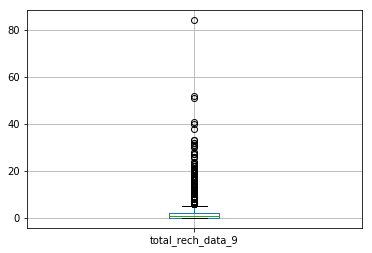

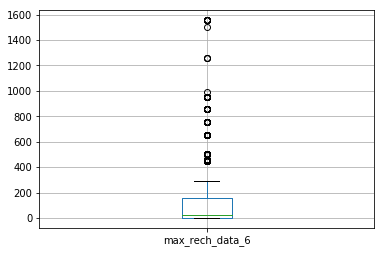

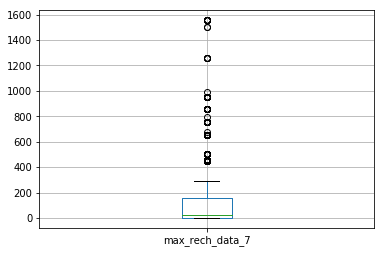

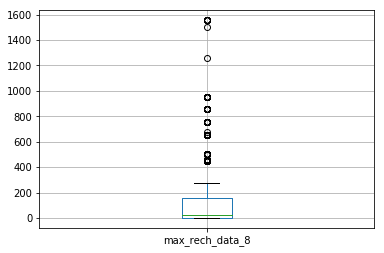

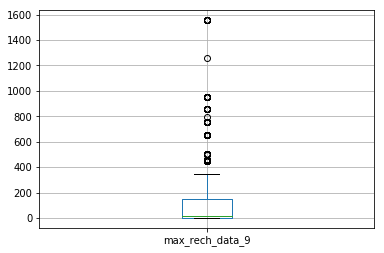

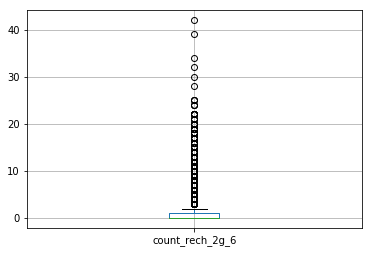

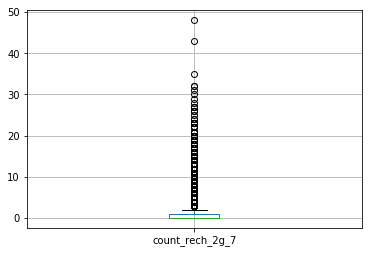

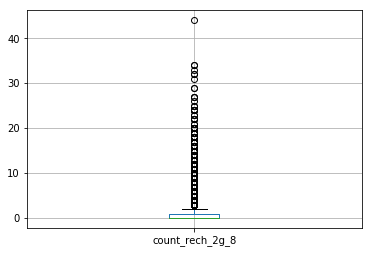

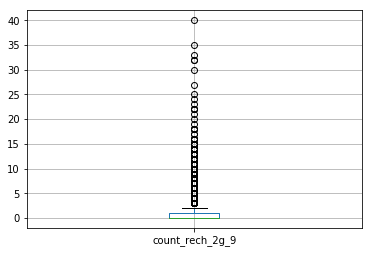

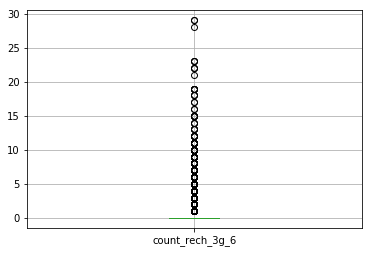

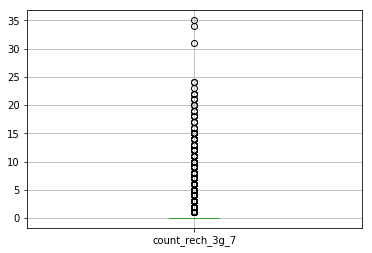

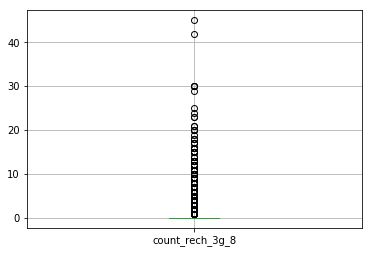

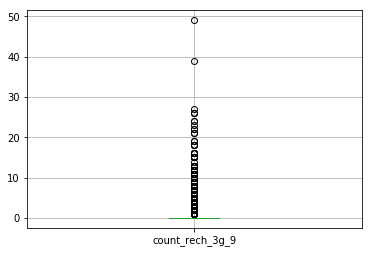

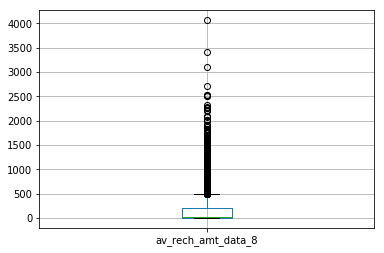

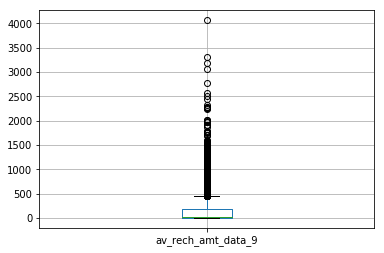

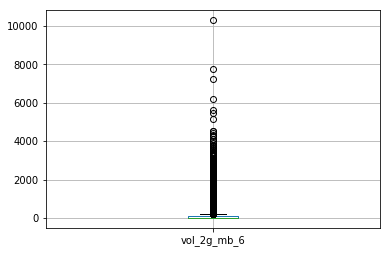

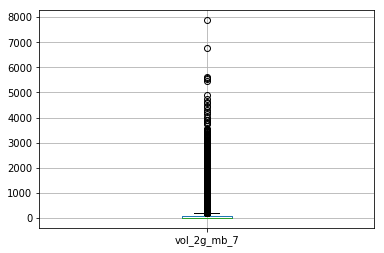

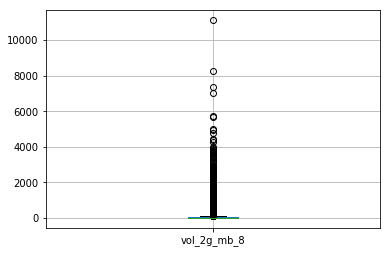

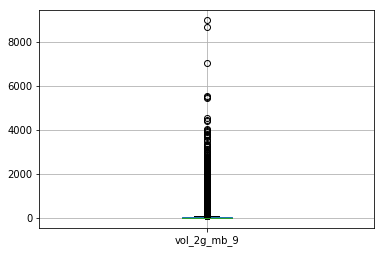

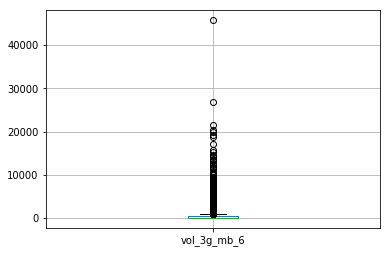

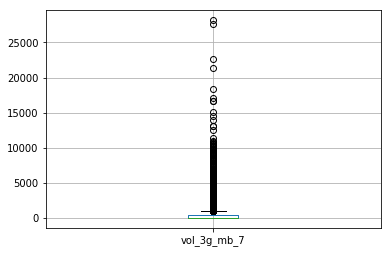

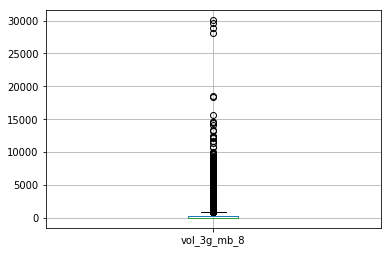

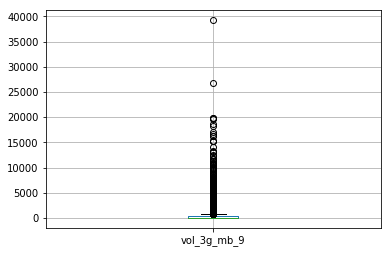

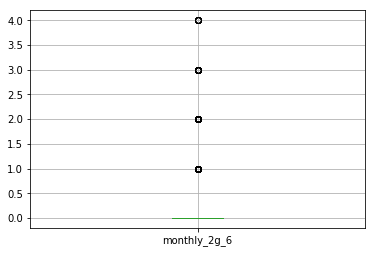

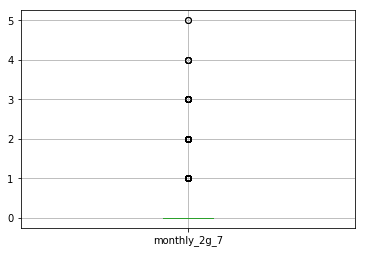

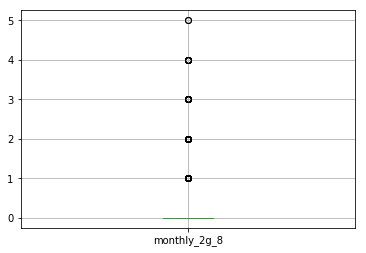

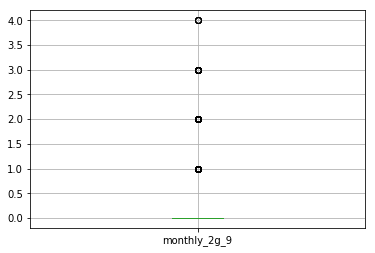

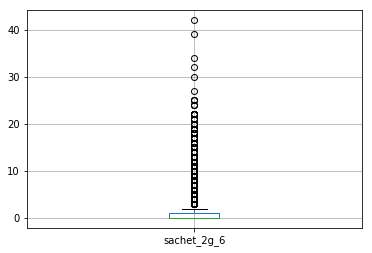

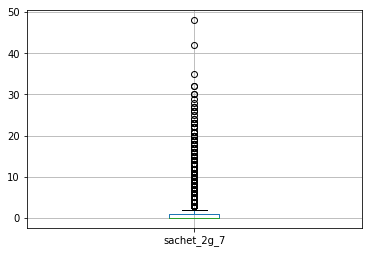

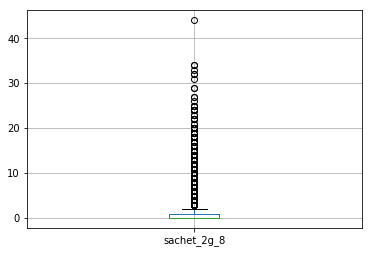

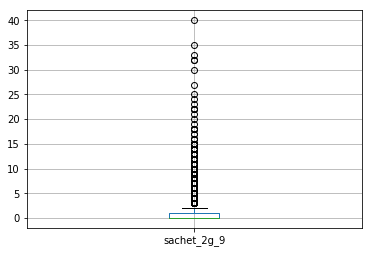

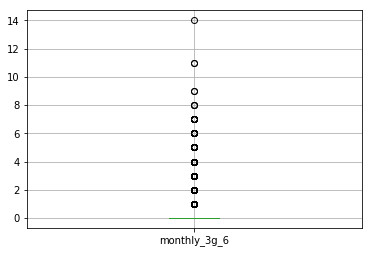

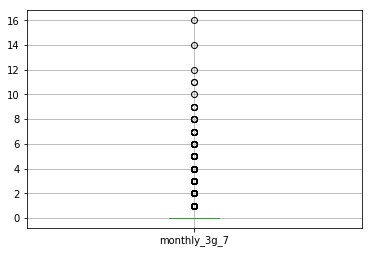

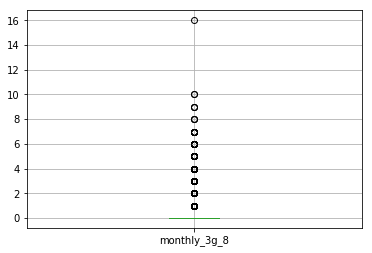

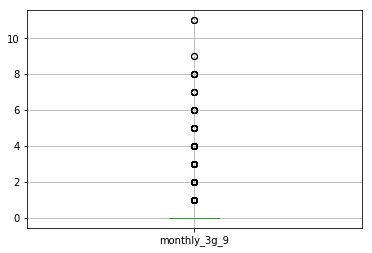

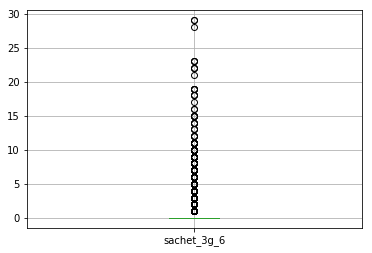

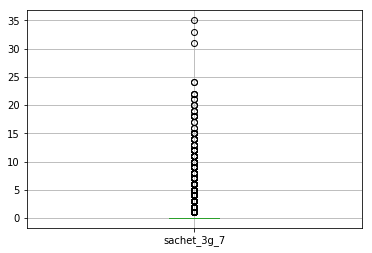

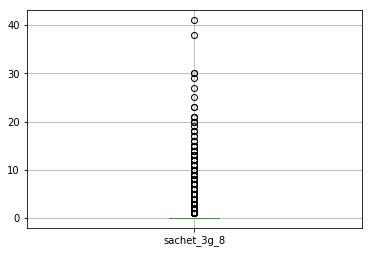

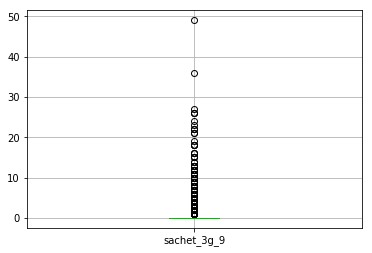

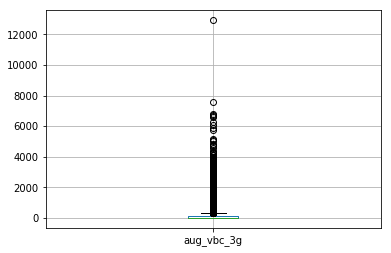

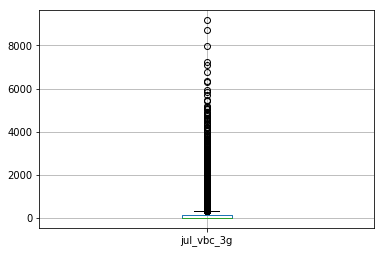

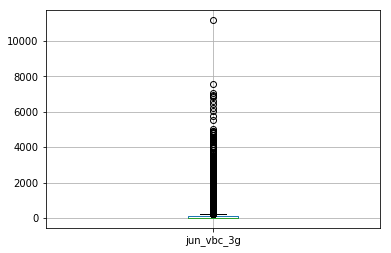

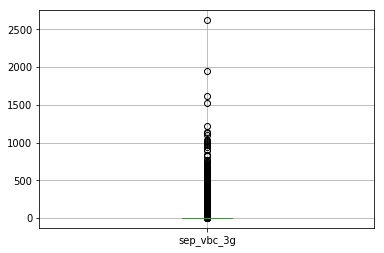

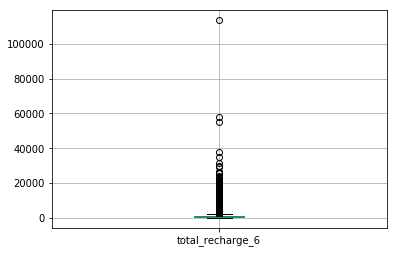

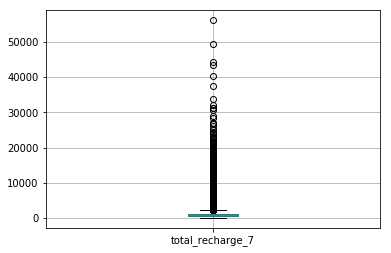

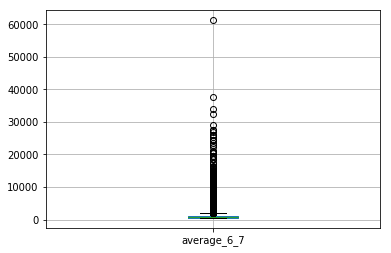

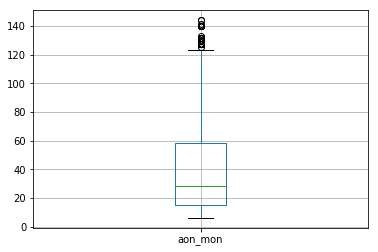

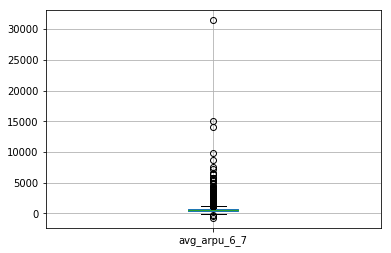

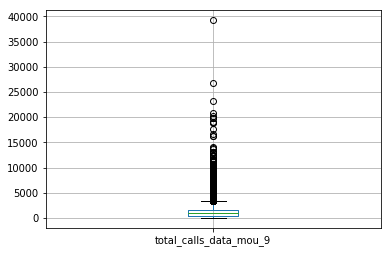

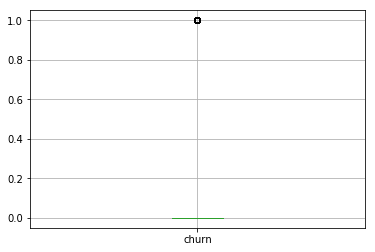

In [48]:
# Let's create boxplots of columns to get an idea of outliers
for column in df:
    plt.figure()
    df.boxplot([column])

In [49]:
df.shape

(30001, 196)

In [50]:
# Now let's discard values greater than 99 percentile as for most of the columns this value range has created outliers
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
threshold = 3
IQR = Q3 - Q1

df = df[~((df < (Q1 - threshold * IQR)) |(df > (Q3 + threshold * IQR))).any(axis=1)]

In [51]:
df.describe(percentiles=[.01,.05,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_6,total_recharge_7,average_6_7,aon_mon,avg_arpu_6_7,total_calls_data_mou_9,churn
count,28318.0,28318.0,28318.0,28541.000000,28541.000000,28541.000000,28541.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.00000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.0,28019.0,27401.0,26697.0,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.0,27401.0,26697.0,28541.000000,28541.000000,28541.000000,28541.000000,28007.000000,28019.000000,27401.00000,26697.000000,28007.000000,28019.000000,27401.000000,26697.000000,28007.000000,28019.000000,27401.00000

In [52]:
df.shape

(28541, 196)

In [53]:
# Let's find out how many columns do we have with recharge information
mon9_cols =[x for x in df.columns[df.columns.str.contains('_9')]]
mon9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_calls_data_mou_9']

In [54]:
df.drop(mon9_cols, axis=1, inplace=True) 

In [57]:
df.shape

(28541, 148)

### Imputation

In [58]:
df_cols=df.columns
ii=IterativeImputer()
df_clean=pd.DataFrame(ii.fit_transform(df))

In [59]:
df_clean.describe(percentiles=[.01,.05,.25,.5,.75,.90,.95,.99])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
count,28541.0,28541.0,28541.0,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.0,28541.0,28541.0,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.0,28541.0,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.0,28541.0,28541.0,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.00000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000
mean,0.0,0.0,0.0,540.943797,541.768411,486.927193,251.428854,258.108143,218.726818,373.897769,377.730222,338.940573,15.414603,11.041299,11.592129,26.100049,18.765901,18.988671,77.257396,77.150882,65.061113,163.851946,164.175928,155.655936,6.003605,6.359758,6.014319,1.461292,1.705303,1.631044,247.119931,247.695962,226.740290,165.624852,174.677843,147.973401,182.714346,189.877364,161.792982,1.679705,1.991830,1.630341,0.0,0.0,0.0,350.021195,366.552488,311.395347,-3.329787,-2.833390,-5.119605,5.434862,6.529804,6.140724,0.617785,0.0,0.0,599.871358,617.952027,539.161743,60.081717,60.583517,54.575133,150.421253,151.482311,148.831883,14.707454,15.340867,14.093802,225.218041,227.415194,217.509771,11.147845,11.586392,9.617890,26.648884,27.437038,25.373531,2.040244,2.132672,1.975733,0.0,0.0,0.0,39.840258,41.159863,36.968641,271.875952,276.264057,260.018729,-1.558124,-1.409835,-2.981069,7.661395,8.188079,7.762601,0.727997,0.916052,0.779415,11.713360,11.583406,9.803896,558.933990,165.520619,167.944080,155.57787,98.778389,98.457062,89.371255,1.582075,77.849480,79.505518,72.028310,1.241407,1.396763,1.201149,0.404015,0.425598,0.380926,119.971266,126.029265,123.880695,104.030558,329.741821,355.869074,336.235450,0.175222,0.183596,0.153428,1.066185,1.213167,1.047721,0.214358,0.224239,0.206580,0.189657,0.201359,0.174346,166.845628,175.997673,156.215605,7.113055,1066.413695,1134.031597,1100.222646,40.321331,541.356104,0.082338
std,0.0,0.0,0.0,364.155695,364.394276,382.004583,443.100990,459.300694,435.747439,467.060703,483.928609,452.995476,62.657812,52.464921,51.070446,105.853372,85.691001,84.901249,205.237183,208.846196,190.436277,241.

In [60]:
#Let's put back column names which got stripped after sklern imputation 
df_clean.columns=df.columns

In [61]:
# Let's again check for null values
100*df_clean.isnull().sum()/len(df_clean)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
                     ... 
count_rech_3g_8       0.0
av_rech_amt_data_8    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_3g_mb_6           0.0
vol_3g_mb_7           0.0
vol_3g_mb_8 

In [117]:
# If we don't want to run imputation again and again, we can save results to a file

In [62]:
#df_clean.to_csv("df_clean_imp_new.csv")

In [63]:
# df_clean=pd.read_csv("df_clean.csv")
pd.options.display.max_columns = None

##### Assignment of Feature variable and response variable

In [64]:
# Putting feature variable to X
X = df_clean.drop(['churn'],axis=1)

# Putting response variable to y
y = df_clean['churn']

y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [65]:
X.shape

(28541, 147)

##### Splitting the data into train and test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.2,random_state=2)

In [67]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19978, 147), (5709, 147), (19978,), (5709,))

#### Feature Standardization

In [68]:
# Feature Standardization
# scaling the features
#from sklearn.preprocessing import scale
#X_scaled = scale(X)

scaler = MinMaxScaler()

# Fit and transform training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Class Imbalance check

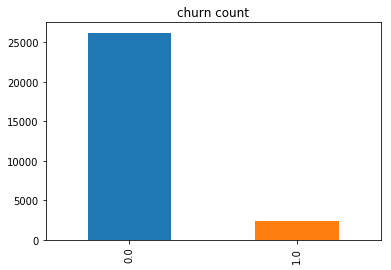

In [69]:
churn_count = df_clean.churn.value_counts()
churn_count.plot(kind='bar', title='churn count')
plt.show()

We observe that there's class imbalance with churn customer count as 2314 and non-churn customer count being 25930

###### Checking Churn Rate before SMOTE

In [70]:
churn = (sum(df_clean['churn'])/len(df_clean['churn'].index))*100
churn

8.233768963946602

#### Using SMOTE to treat class imbalance

In [71]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [72]:
X_sm.shape,y_sm.shape

((36728, 147), (36728,))

In [73]:
np.count_nonzero(y_sm)

18364

#### Checking Churn Rate before SMOTE

In [74]:
churn = (sum(y_sm)/len(y_sm.index))*100
churn

50.0

In [75]:
def print_eval_metric(predictions):
    # print f1-score
    print("roc_auc_score",roc_auc_score(y_test,predictions))

    # accuracy

    print("accuracy",accuracy_score(y_test, predictions))


    # recall/sensitivity
    print("recall", recall_score(y_test, predictions))


#### Model Building: Without PCA

##### Model 1: Logistic Regression (without PCA )

In [76]:
lr = LogisticRegression()

In [77]:
lr = lr.fit(X_sm, y_sm)

In [78]:
y_lr = lr.predict(X_test)

In [79]:
print(confusion_matrix(y_test,y_lr))

[[4459  757]
 [  87  406]]


In [80]:
print_eval_metric(y_lr)

roc_auc_score 0.8391995218332732
accuracy 0.8521632510071816
recall 0.8235294117647058


In [81]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      5216
         1.0       0.35      0.82      0.49       493

    accuracy                           0.85      5709
   macro avg       0.66      0.84      0.70      5709
weighted avg       0.93      0.85      0.88      5709



In [84]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_lr)
roc_auc = metrics.auc(fpr, tpr)

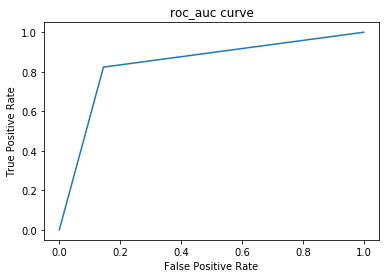

In [109]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_auc curve')
plt.show() 

As we notice that without PCA we obtained recall = 82.3% using logistic regression.   
Important to mention that we used 147 features which is quite high.We will use PCA ad dimentionality reduction technique to reduce sixe of feature set and compare performance using different models. For us without pca f1-score baseline is : 0.83

### Feature Importance

In [89]:
rf = RandomForestClassifier()
rf.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(X.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [91]:
# Display
fi_30 = fi.head(30)

In [92]:
fi_30

,feature,importance
17,roam_og_mou_8,0.087072
14,roam_ic_mou_8,0.064862
89,total_ic_mou_8,0.062147
102,total_rech_amt_8,0.032751
5,arpu_8,0.030500
71,loc_ic_mou_8,0.030476
32,loc_og_mou_8,0.030070
108,last_day_rch_amt_8,0.026782
119,av_rech_amt_data_8,0.026285
109,total_rech_data_8,0.025572


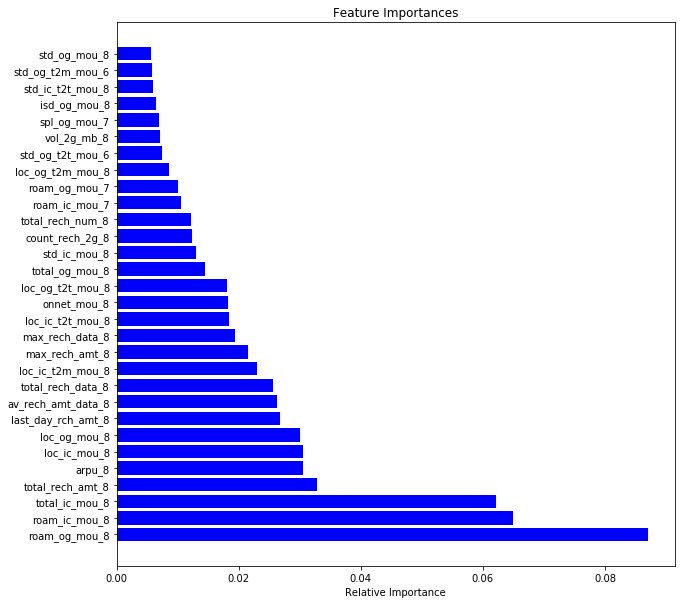

In [93]:
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(fi_30)), list(fi_30['importance']), color='b', align='center')
plt.yticks(range(len(fi_30)), [i for i in  fi_30['feature']])
plt.xlabel('Relative Importance')
plt.show()

Important Feature List:

Most of the important features belong to 8th month which is the "Action phase".
Features that telecom company needs to focus on are:
Incoming and outgoing calls Local and Roaming both are strong KPI's, 
also Telecom companies need to be watchful of the recharge amount for calls and data.

If there's any decrease in these KPI's that means that customer is losing interest in the company.
This would be the right time to try to retain the customer using offers and competitive prices

### PCA (Principal Component Analysis)

In [94]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True,precision=2)

In [95]:
pca = PCA(random_state=100)
pca.fit(X_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [96]:
pca.components_

array([[-0.  , -0.  ,  0.  , ..., -0.  , -0.09, -0.03],
       [ 0.  , -0.  , -0.  , ...,  0.02,  0.12, -0.07],
       [-0.  ,  0.  , -0.  , ..., -0.  , -0.24,  0.16],
       ...,
       [-0.  ,  0.03, -0.04, ...,  0.02, -0.  , -0.03],
       [ 1.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ],
       [-0.  , -0.11,  0.65, ...,  0.11,  0.  ,  0.35]])

In [97]:
pca.explained_variance_

array([0.21, 0.07, 0.06, 0.06, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ])

In [98]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

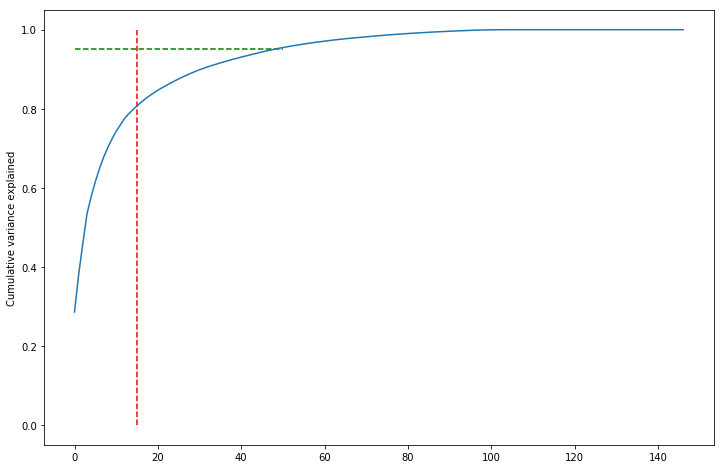

In [99]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with top-n components

In [100]:
pca_final = IncrementalPCA(n_components=50)
df_train_pca = pca_final.fit_transform(X_sm)

In [101]:
df_test_pca = pca_final.transform(X_test)

In [102]:
df_train_pca.shape,df_test_pca.shape

((36728, 50), (5709, 50))

In [103]:
corrmat = np.corrcoef(df_train_pca.transpose())

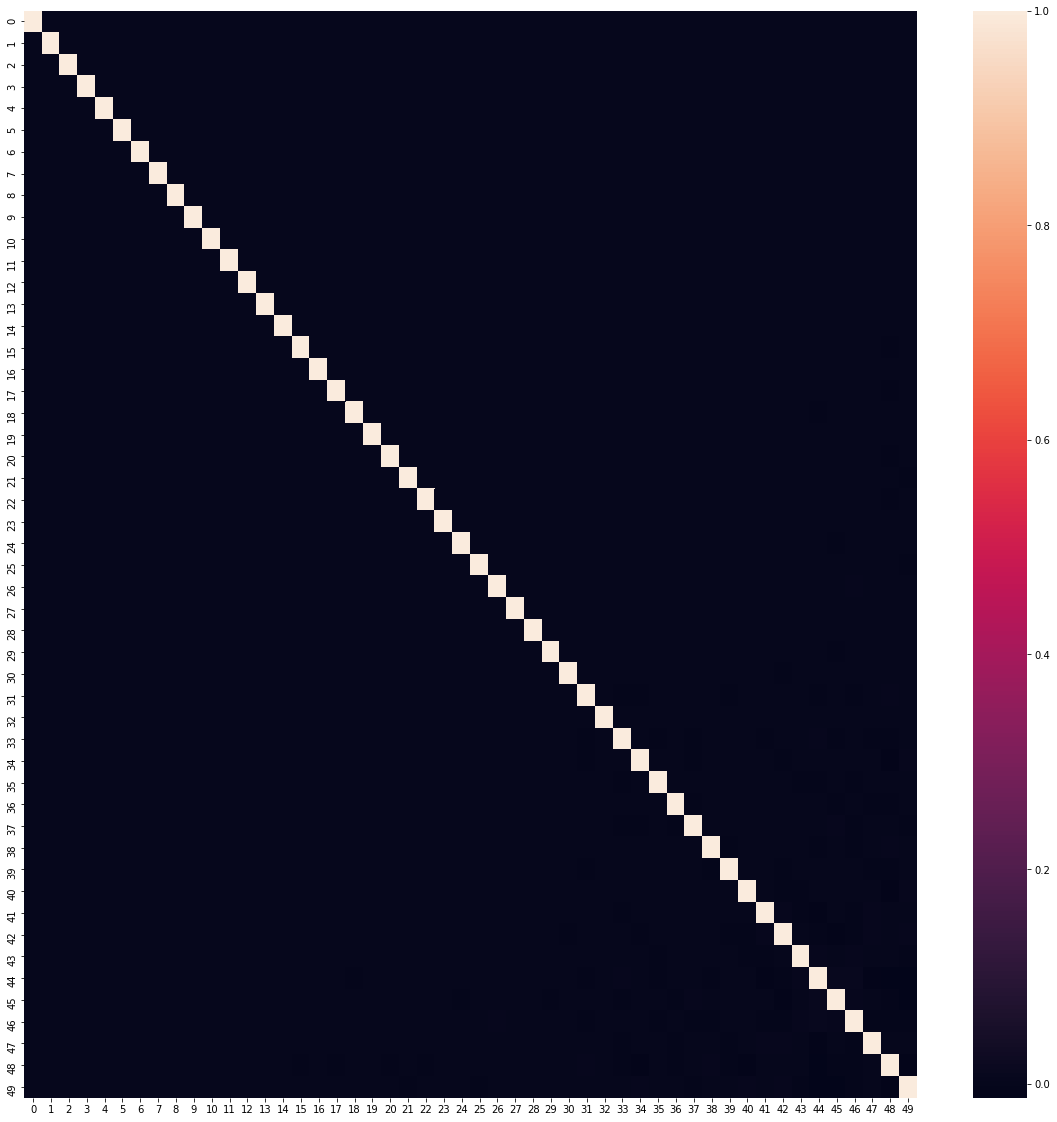

In [104]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat,annot_kws={'size':8})

As per the heat map, No Correlation found between features which is good.

### Model Building with PCA

#### Model 1: SVM (with PCA)

In [105]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
from sklearn.svm import SVC
svc_model = SVC()

# fit
svc_model.fit(df_train_pca,y_sm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
# predict
y_svc_pred = svc_model.predict(df_test_pca)

In [111]:
confusion_matrix(y_true=y_test, y_pred=y_svc_pred)

array([[4629,  587],
       [ 123,  370]], dtype=int64)

In [112]:
print_eval_metric(y_svc_pred)

roc_auc_score 0.8189843779165993
accuracy 0.8756349623401647
recall 0.7505070993914807


In [113]:
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      5216
         1.0       0.39      0.75      0.51       493

    accuracy                           0.88      5709
   macro avg       0.68      0.82      0.72      5709
weighted avg       0.92      0.88      0.89      5709



##### model robustness(k-fold cross validation)

In [114]:
# 5 fold cross validation
svm_score = cross_val_score(svc_model, df_train_pca, y_sm, cv = 5, scoring = scorer)

In [115]:
print(f'5 Fold Cross Validation F1 Score = {round(svm_score.mean(), 4)} with std = {round(svm_score.std(), 4)}')

5 Fold Cross Validation F1 Score = 0.8946 with std = 0.0036


In [116]:
print(svm_score)
print("mean F1 Score = {}".format(svm_score.mean()))

[0.89 0.9  0.89 0.9  0.9 ]
mean F1 Score = 0.8946306572663854


##### Grid Search to Find Optimal Hyperparameter C

In [118]:
# specify range of parameters (C) as a list
params = {"C": [1,100,1000]}

model_svm = SVC()

# set up grid search scheme
model_svm_grid = GridSearchCV(estimator = model_svm, param_grid = params, 
                        scoring= scorer,
                        verbose = 1,
                       return_train_score=True)   

In [119]:
# fit the model - it will fit 5 folds across all values of C
model_svm_grid.fit(df_train_pca,y_sm)  

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 30.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(recall_score, average=macro), verbose=1)

In [120]:
# results of grid search CV
svm_results = pd.DataFrame(model_svm_grid.cv_results_)
svm_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,56.76,8.38,0.89,0.90,1,{'C': 1},3,0.89,0.90,0.90,0.90,0.89,0.90,0.90,0.90,0.90,0.90,4.64,1.86,0.00,0.00
1,91.82,2.68,0.95,0.98,100,{'C': 100},2,0.95,0.98,0.96,0.98,0.96,0.98,0.96,0.98,0.96,0.98,3.24,0.18,0.00,0.00
2,157.51,1.59,0.96,0.99,1000,{'C': 1000},1,0.96,1.00,0.96,1.00,0.96,0.99,0.97,0.99,0.96,1.00,4.48,0.04,0.00,0.00


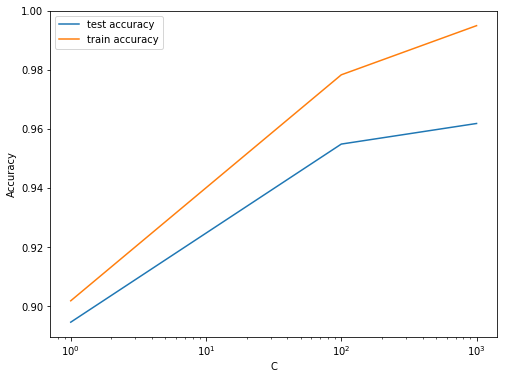

In [121]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(svm_results['param_C'], svm_results['mean_test_score'])
plt.plot(svm_results['param_C'], svm_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

##### Select best estimator after gridseacrh

In [122]:
model_svm_best = model_svm_grid.best_estimator_
model_svm_best

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
y_pred_svm_best = model_svm_best.predict(df_test_pca)

In [124]:
confusion_matrix(y_true=y_test, y_pred=y_pred_svm_best)

array([[4905,  311],
       [ 255,  238]], dtype=int64)

In [125]:
print_eval_metric(y_pred_svm_best)

roc_auc_score 0.7115671937804104
accuracy 0.9008582939218778
recall 0.4827586206896552


In [126]:
print(classification_report(y_test,y_pred_svm_best))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      5216
         1.0       0.43      0.48      0.46       493

    accuracy                           0.90      5709
   macro avg       0.69      0.71      0.70      5709
weighted avg       0.91      0.90      0.90      5709



In [127]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_svm_best)
roc_auc = metrics.auc(fpr, tpr)

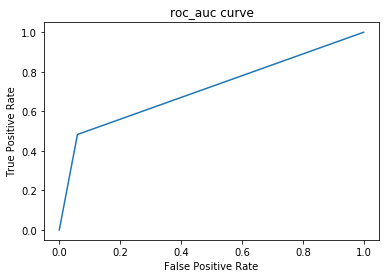

In [128]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_auc curve')
plt.show() 

We notice that after hyperparamter tuning has not much improvised our results.
It was working better with the default hyperparameters.

Now lets explore other algos:randomforest,xgboost etc

#### Model 2: RandomForest (with PCA)

In [129]:
# Running the random forest with default parameters.
model_rfc=RandomForestClassifier()

In [130]:
model_rfc.fit(df_train_pca,y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
# Making predictions
rfc_pred_pca = model_rfc.predict(df_test_pca)

In [132]:
confusion_matrix(y_true=y_test, y_pred=rfc_pred_pca)

array([[5015,  201],
       [ 229,  264]], dtype=int64)

In [133]:
print_eval_metric(rfc_pred_pca)

roc_auc_score 0.7484808406650157
accuracy 0.9246803293046068
recall 0.5354969574036511


In [134]:
# Let's check the report of our default model
print(classification_report(y_test,rfc_pred_pca))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      5216
         1.0       0.57      0.54      0.55       493

    accuracy                           0.92      5709
   macro avg       0.76      0.75      0.76      5709
weighted avg       0.92      0.92      0.92      5709



###### Hyperparameter tuning

In [135]:
# parameter grid
parameters = {
#   "max_depth" : [10,20,30,40,50],
  "n_estimators": [100,50],
  "min_samples_leaf": [1,2,5]
    }

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf_grid = GridSearchCV(rf, parameters,
                   scoring=scorer,
                  return_train_score=True)

In [136]:
rf_grid.fit(df_train_pca,y_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [137]:
rf_best = rf_grid.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
# Making predictions
rf_pred_best = rf_best.predict(df_test_pca)

In [139]:
confusion_matrix(y_true=y_test, y_pred=rf_pred_best)

array([[5015,  201],
       [ 223,  270]], dtype=int64)

In [140]:
print_eval_metric(rf_pred_best)

roc_auc_score 0.7545660333627846
accuracy 0.9257313014538449
recall 0.5476673427991886


In [141]:
# Let's check the report of our default model
print(classification_report(y_test,rf_pred_best))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      5216
         1.0       0.57      0.55      0.56       493

    accuracy                           0.93      5709
   macro avg       0.77      0.75      0.76      5709
weighted avg       0.92      0.93      0.92      5709



In [145]:
# results of grid search CV
rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,17.17,0.12,0.96,1.00,1,100,"{'min_samples_leaf': 1, 'n_estimators': 100}",1,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00,0.37,0.01,0.00,0.00
1,8.88,0.07,0.96,1.00,1,50,"{'min_samples_leaf': 1, 'n_estimators': 50}",2,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00,0.04,0.01,0.00,0.00
2,17.40,0.12,0.96,1.00,2,100,"{'min_samples_leaf': 2, 'n_estimators': 100}",3,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00,0.96,1.00,0.25,0.01,0.00,0.00
3,8.80,0.06,0.96,1.00,2,50,"{'min_samples_leaf': 2, 'n_estimators': 50}",4,0.95,1.00,0.96,1.00,0.95,1.00,0.96,1.00,0.95,1.00,0.08,0.00,0.00,0.00
4,16.66,0.12,0.95,0.99,5,100,"{'min_samples_leaf': 5, 'n_estimators': 100}",5,0.94,0.99,0.95,0.99,0.94,0.99,0.95,0.99,0.95,0.99,0.21,0.01,0.00,0.00
5,8.41,0.06,0.94,0.99,5,50,"{'min_samples_leaf': 5, 'n_estimators': 50}",6,0.94,0.99,0.94,0.99,0.94,0.99,0.95,0.99,0.95,0.99,0.10,0.01,0.00,0.00


In [146]:
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_pred_best)
roc_auc = metrics.auc(fpr, tpr)

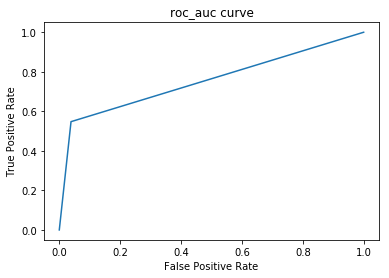

In [147]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_auc curve')
plt.show() 

#### Model 3: LogisticRegression with PCA

This time we are using Logisic Regression with PCA to draw contrast with the Logistic Regression Model without PCA

In [148]:
lr_pca = LogisticRegression()
lr_pca = lr_pca.fit(df_train_pca, y_sm)
y_lr_pred = lr_pca.predict(df_test_pca) 

In [149]:
confusion_matrix(y_true=y_test, y_pred=y_lr_pred)

array([[4456,  760],
       [  94,  399]], dtype=int64)

In [150]:
print_eval_metric(y_lr_pred)

roc_auc_score 0.8318125536654265
accuracy 0.8504116307584516
recall 0.8093306288032455


In [151]:
# Let's check the report of our default model
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      5216
         1.0       0.34      0.81      0.48       493

    accuracy                           0.85      5709
   macro avg       0.66      0.83      0.70      5709
weighted avg       0.92      0.85      0.88      5709



In [153]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_lr_pred)
roc_auc = metrics.auc(fpr, tpr)

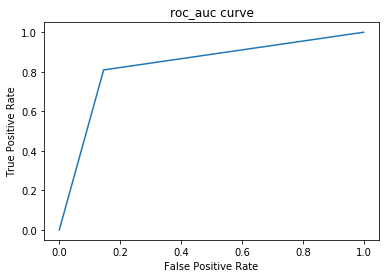

In [154]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_auc curve')
plt.show() 

Parameter Tuning for Logistic Regression

In [157]:
lr_grid=LogisticRegression(C=100, max_iter=100, penalty='l2', random_state=None)

In [158]:
lr_grid.fit(df_train_pca,y_sm)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
lr_tune_pred = lr_grid.predict(df_test_pca) 

In [160]:
confusion_matrix(y_true=y_test, y_pred=lr_tune_pred)

array([[4460,  756],
       [  92,  401]], dtype=int64)

In [164]:
print_eval_metric(lr_tune_pred)

roc_auc_score 0.8342243868141713
accuracy 0.8514626029076896
recall 0.8133874239350912


In [165]:
# Let's check the report of our default model
print(classification_report(y_test,lr_tune_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91      5216
         1.0       0.35      0.81      0.49       493

    accuracy                           0.85      5709
   macro avg       0.66      0.83      0.70      5709
weighted avg       0.93      0.85      0.88      5709



In [167]:
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_tune_pred)
roc_auc = metrics.auc(fpr, tpr)

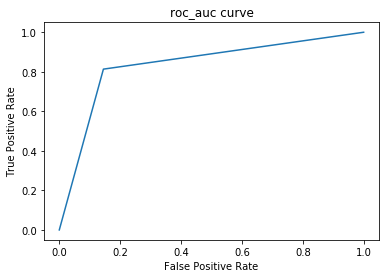

In [168]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_auc curve')
plt.show() 

Conclusion: We see very slight increase in our metric results (roc_auc_score, accuracy and recall) after parameter tuning.  

Logistic Regression is our best performing Model

### Model Selection

<b>Parameters to select best Model </b>     
In this case study, If we determine people who have not churned as churned (False positive), it is still tolerable
But we should never classify churned customer as not churned(False Negative).
Hence, in this case, Recall is the most important metric.

  
<b>Selected Model </b>  



Now, going back at the model metrics, i find Logistic Regression Model to be the best performing model.   
It yields ~83% recall with 85% accuracy without PCA and with PCA it yields 80% recall with 85% accuracy.

Close second is the SVM Model(with PCA) which yields ~75% recall with 87% accuracy

And RandomForest Model(with PCA) yields ~52% recall with 97% accuracy.

### Recommendations to Telecom Company

First of all, Churn rate of High Value customers is not very high (~8%) which is good but still telecom companies need to strategize to further reduce this churn rate

Most of the important features are concerning 8th Month so company needs to analyze the parameters of the 8th Month 
which will form the basis of their course of action plan

Telecom company needs to pay attention to below KPI's in the 8 the month (Action Phase):

Top 10 important features which are the best indicators of Churn are:
1. roam_ic_mou_8
2. roam_og_mou_8
3. total_ic_mou_8
4. loc_ic_mou_8
5. loc_ic_t2t_mou_8
6. total_rech_amt_8
7. loc_og_mou_8
8. total_rech_data_8
9. av_rech_amt_data_8
10. arpu_8

Telecom company needs to focus on the total recharge amount of the customers and 
design their tarriffs based on the popularity trend of the purchase

Company should be watchful of the amount of outgoing and incoming calls and try to offer competitive prices 
(as compared to their market competitors)

Some offers and discount on minutes of usage would help as there are strong KPI's concerning MOU (Minutes of Usage)

Most of the customers getting churned have less than 4 years of relationship with the company. Such users are generating good revenue for the company so they are important user base that company needs to focus on retaining.
To do so, Telecom company can devise special tarriffs, discounts and promotional offers 